# Identificações de Padrões nos Pagamentos de Empréstimos

## Introdução

Hoje em dia, fala-se muito da recessão econômica causada pela pandemia de Covid-19. Isso nos lembra a recessão que ocorreu nos EUA em 2009, também conhecida como crise financeira bancária. Acredita-se que a recessão de 2009 poderia ter sido evitada se os bancos tivessem escolhido cuidadosamente seus pagadores de empréstimos. 

Os empréstimos incobráveis na maioria dos casos referem-se a atrasos no pagamento ou inadimplência, que são duas das causas mais comuns de perda de receita bancária e até falência. Atualmente, muitos bancos e fintechs investem amplamente em gestão de risco ou avaliação de crédito para obter informações melhores, baseadas em dados, para tomada de decisões no que diz respeito a concessão de empréstimos. 

Neste desafio, desejamos saber de antemão quem é capaz de pagar seus empréstimos e quem não é. O principal objetivo é analisar dados e criar um modelo para descobrir quais clientes são capazes de honrar suas dívidas.

## Desenvolvimento

In [1]:
## --- bibliotecas de estruturas de dados e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## --- funções de pré-processamento
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

## --- bibliotecas de machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## --- métricas para avaliação de performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


import pickle

from subroutines import reduce_mem_usage, display_feat_import, tryconvert
from subroutines import display_percent_count_plot, cf_matrix_labels, dist_medians
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

#### Primeiras Impressões

Primeiro, damos uma olhada no conjunto de dados que recebemos para que possamos nos familiarizar com as variáveis e os tipos de dados. 

In [2]:
df = reduce_mem_usage(pd.read_csv('./inputs/desafio_de_credito_train.csv', engine='c'))
test_data = reduce_mem_usage(pd.read_csv('./inputs/desafio_de_credito_test.csv', engine='c'))
df.head(5)

Memory usage of dataframe is 11.04 MB


  0%|          | 0/28 [00:00<?, ?it/s]

Memory usage after optimization is: 9.29 MB
Decreased by 15.9%
Memory usage of dataframe is 2.66 MB


  0%|          | 0/27 [00:00<?, ?it/s]

Memory usage after optimization is: 2.30 MB
Decreased by 13.4%


,id,default,risk,var_a,var_b,var_c,var_d,var_e,var_f,borrowed,...,zipcode,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,Unnamed: 27
0,5e78f987-3e90-55a9-12f8-423c4d63d254,False,0.229980,380.0,1.011224e+11,0.242065,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,8.577248080740E+11,2.0007460E+04,...,I59IKILFeR11yojhG96N+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,nSpvDsIsslUaX6GE6m6eQA==,<NA>,0.0,0.0,14.0,14.0,NaN
1,f4f28e96-099f-0ffa-6956-d5befffb7191,False,0.270020,230.0,1.003023e+11,0.073914,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,1.091957184890E+11,1.5023510E+04,...,MXqE7D0NclzbvSzSxV4b/Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,<NA>,0.0,0.0,15.0,15.0,NaN
2,b93c6a30-ce80-546c-7ee6-6fc7d27320b4,False,0.370117,410.0,9.985688e+15,0.425293,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,9.913378437990E+15,5.5194400E+03,...,IpcloQ5L38SqkCCOw56sxA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,<NA>,0.0,0.0,7.0,NaN,NaN
3,54f1cfe1-8239-ba99-e926-61dba5a4b119,False,0.219971,150.0,1.019885e+10,0.079468,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,9.392667085070E+15,1.2039850E+04,...,6ed9f7AFad3DQhc3r1jJXA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,<NA>,0.0,0.0,8.0,8.0,NaN
4,5be46214-a131-1b23-673f-43aa906fa5d6,False,0.409912,460.0,9.799174e+11,0.436035,e4NYDor1NOw6XKGE60AWFw==,cdpgyOyZS04uXerMNu7uCw==,1.037118548670E+16,2.0083850E+04,...,qKogS9/663ARmbMpyXG9og==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,<NA>,0.0,0.0,8.0,8.0,NaN


In [3]:
df.dtypes

id                    string
default               object
risk                 float16
var_a                float16
var_b                float32
var_c                float16
var_d                 object
var_e                 object
var_f                 object
borrowed              object
months               float16
limit                float32
reason                object
income                object
sign                  string
sex                   string
social_network        object
state                 object
zipcode               object
channel               object
job_name              object
real_state            object
ok_since              string
n_bankruptcies       float16
n_defaulted_loans    float16
n_accounts           float16
n_issues             float16
Unnamed: 27          float16
dtype: object

Vou verificar o que acontece com as colunas marcadas com o tipo **object**. Parecem haver algumas inconsistências.

Na coluna *default* existem valores faltantes

In [4]:
df['default'].unique()

array([False, True, nan], dtype=object)

A coluna *var_f* deveria ser do tipo "float", porém existem algumas entradas inconsistentes que impedem a conversão de tipo. Vou tratar estas inconsistências como NaN. O mesmo acontece com as colunas *borrowed* e *income*.

In [5]:
df['var_f']    = df['var_f'].apply(lambda x: tryconvert(x, np.NaN, float)).astype(float)
df['borrowed'] = df['borrowed'].apply(lambda x: tryconvert(x, np.NaN, float)).astype(float)
df['income']   = df['income'].apply(lambda x: tryconvert(x, np.NaN, float)).astype(float)

test_data['var_f']    = test_data['var_f'].apply(lambda x: tryconvert(x, np.NaN, float)).astype(float)
test_data['borrowed'] = test_data['borrowed'].apply(lambda x: tryconvert(x, np.NaN, float)).astype(float)
test_data['income']   = test_data['income'].apply(lambda x: tryconvert(x, np.NaN, float)).astype(float)

As colunas *reason*,*state*, *zipcode*, *channel*, *job_name* e *real_state* poderiam ser do tipo "string".

In [6]:
df['reason']     = df['reason'].astype(str)
df['state']      = df['state'].astype(str)
df['zipcode']    = df['zipcode'].astype(str)
df['channel']    = df['channel'].astype(str)
df['job_name']   = df['job_name'].astype(str)
df['real_state'] = df['real_state'].astype(str)

test_data['reason']     = test_data['reason'].astype(str)
test_data['state']      = test_data['state'].astype(str)
test_data['zipcode']    = test_data['zipcode'].astype(str)
test_data['channel']    = test_data['channel'].astype(str)
test_data['job_name']   = test_data['job_name'].astype(str)
test_data['real_state'] = test_data['real_state'].astype(str)

A coluna *social_network* possui os seguintes problemas: Tipos diferentes, valores inputados de forma errada e valores faltantes. Vou bordar da seguinte forma: Os valores presentes serão reconhecidos como o tipo "str" e serão agrupados de acordo com a primeira letra da cadeia de caracteres: ex 'f' -> 'False'; 't' -> 'True'. Os valores faltantes continuarão como NaN.

In [7]:
df['social_network'] = df['social_network'].apply(lambda x: 'True' if str(x).lower()[0] == 't' else
                                                            'False' if str(x).lower()[0] == 'f' else x)

test_data['social_network'] = test_data['social_network'].apply(lambda x: 'True' if str(x).lower()[0] == 't' else
                                                            'False' if str(x).lower()[0] == 'f' else x)

Agora procuramos se existem colunas que contenham ao menos 1 valor faltante. Caso positivo, verificamos o percentual de ocorrência destes valores nas determinadas colunas.

In [8]:

if df.isna().any().sum()==0:
    print('Não existem valores faltantes no dataset.')
else:
    print('Algum valor faltante foi encontrado.')

Algum valor faltante foi encontrado.


In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
pd.DataFrame({'column_name': df.columns,
              'percent_missing': percent_missing})

,column_name,percent_missing
id,id,0.000000
default,default,7.183497
risk,risk,1.250145
var_a,var_a,1.250145
var_b,var_b,0.000000
var_c,var_c,0.000000
var_d,var_d,1.250145
var_e,var_e,1.250145
var_f,var_f,0.001935
borrowed,borrowed,1.252080


* A coluna **id** possui um valor único para cada entrada e portanto não possui significado estatístico. Vou eliminar esta coluna
* A coluna **Unnamed: 27** é composta quase que somente por valores faltantes. Sendo assim, vou eliminar esta coluna do dataset.
* A coluna **default**, variável alvo, contém alguns valores faltantes. Aqui existem duas opções: eleminar as linhas que contenham valores NaN na variável default, ou utilizar um ou mais modelos para inserir corretamente estes dados. Para começar, vou optar pela opção mais simples que é a de remoção, já que a quantidade de NaNs nesta coluna é de apenas 7%
* A coluna **risk** possui um pequeno número de valores faltantes. Por isso vou preencher estes valores com a moda da coluna.
* Como a coluna **borrowed** possui uma pequena quantidade de missing values, vou eliminar as linhas com NaNs referentes a esta coluna, já que o valor emprestado é altamente relacionado com a inadimplência. Quero evitar métodos de imputação para que o modelo baseline não faça classificações enviesadas.
* Os valores faltantes da coluna **months** serão preenchidos com a moda.
* A coluna **sign** também possui um número considerável de valores faltantes. As entradas desta coluna representam os signos de cada cliente. Minha intuição diz que esta coluna deve ser removida, já que não espero nenhuma correlação entre signos e comportamentos de pagamento. A remoção será feita após análise estatística na seção de EDA.
* A coluna **limit** deve representar o limite de crédito dos clientes. É razoável pensar que esta variável possua correlação com a categoriza em que esse cliente se encontra. Portanto, não vou eliminar os valores NaN, mas sim sibstituí-los por um número negativo arbitrário para que o modelo tente capturar algum comportamento.
* Vou preencher os missing values de **reason** com a moda.
* Os missing values de **income** serão preenchidos com a mediana, já que esta métrica central é menos sensível a outliers.

In [10]:
df.drop(['id','Unnamed: 27'], axis=1, inplace=True)
df.dropna(axis=0, how='all',inplace=True )
df.drop(df[df['sign']=='73007.68'].index, axis=0, inplace=True)
df['var_f'] = df['var_f'].astype(float)
df['income'] = df['income'].astype(float)
df['borrowed'] = df['borrowed'].astype(float)
df['months'].fillna(df['months'].mode()[0], inplace=True)
df['months'] = df['months'].astype('int16')
df['reason'].fillna(df['reason'].mode()[0], inplace=True)
df['income'].fillna(df['income'].median(), inplace=True)
df.loc[df[df['limit'].isna()].index, 'limit'] = -3290



test_data.drop(['id','Unnamed: 27'], axis=1, inplace=True)
test_data.dropna(axis=0, how='all',inplace=True )
test_data['var_f']    = test_data['var_f'].astype(float)
test_data['income']   = test_data['income'].astype(float)
test_data['borrowed'] = test_data['borrowed'].astype(float)
test_data['months'].fillna(test_data['months'].mode()[0], inplace=True)
test_data['months']   = test_data['months'].astype('int16')
test_data['reason'].fillna(test_data['reason'].mode()[0], inplace=True)
test_data['income'].fillna(test_data['income'].median(), inplace=True)
test_data.loc[test_data[test_data['limit'].isna()].index, 'limit'] = -3290

In [11]:
def_nan = df[df['default'].isna()]
df.dropna(axis=0, subset=['default'], inplace=True)

Vejamos agora como ficou o DataFrame

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
pd.DataFrame({'column_name': df.columns,
              'percent_missing': percent_missing})

,column_name,percent_missing
default,default,0.000000
risk,risk,0.000000
var_a,var_a,0.000000
var_b,var_b,0.000000
var_c,var_c,0.000000
var_d,var_d,0.000000
var_e,var_e,0.000000
var_f,var_f,0.000000
borrowed,borrowed,0.000000
months,months,0.000000


Vou manter estes missing values por enquanto e decidir o que fazer com eles após realizar a EDA e a feature importance.

### Análise Exploratória de Dados (EDA)

Antes de abordar o problema criando um modelo computacional, faço uma análise exploratória de dados detalhada. Ao fazer isso, posso categorizar as inadimplências de acordo com os preditores, calcular o número de ocorrências, verificar possíveis desequilíbrios na classe alvo, obter insights sobre a importância de cada variável, visualizar outliers e muito mais. Esta etapa é importante por muitas razões, mas o que gostaria de enfatizar aqui é que a EDA fundamenta minhas decisões ao selecionar os algoritmos apropriados para criar um modelo, bem como me dá uma ideia de quais variáveis são mandatórias para criação dos modelos. 

#### Analise de ocorrência

A análise de ocorrência é bastante simples: examina o número de inadimplentes e número de *bons pagadores* com relação ao total de clientes da base de dados. 

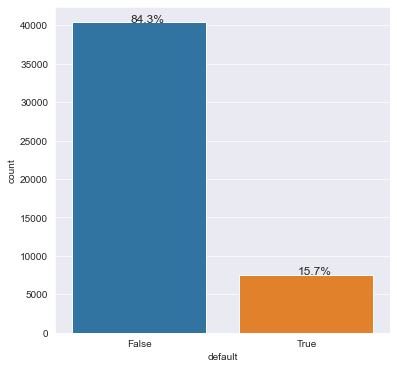

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.countplot(data=df, x='default')
display_percent_count_plot(ax, df['default'],1)
plt.show()

Como podemos ver no gráfico de contagem acima, as classes alvo são bastante desequilibradas. É razoável pensar que o número de inadimplentes (*default == True*) seja bem menor que o número de bons pagadores (*default == False*). Por outro lado, de uma perspectiva estatística, observações desequilibradas nas classes alvo podem causar ao modelo uma precisão bastante alta na previsão da classe majoritária, mas falhará em capturar a classe minoritária; que é o ponto de criar um modelo afinal. 

Existem diversas técnicas para lidar com este tipo de problema, mas por hora vou manter este desequilibrio até que chegue o estagio de avaliação dos modelos baseline.

#### Análise dos signos

Esta análise tem a intenção de categorizar os pagadores de empréstimo quanto aos seus signos.

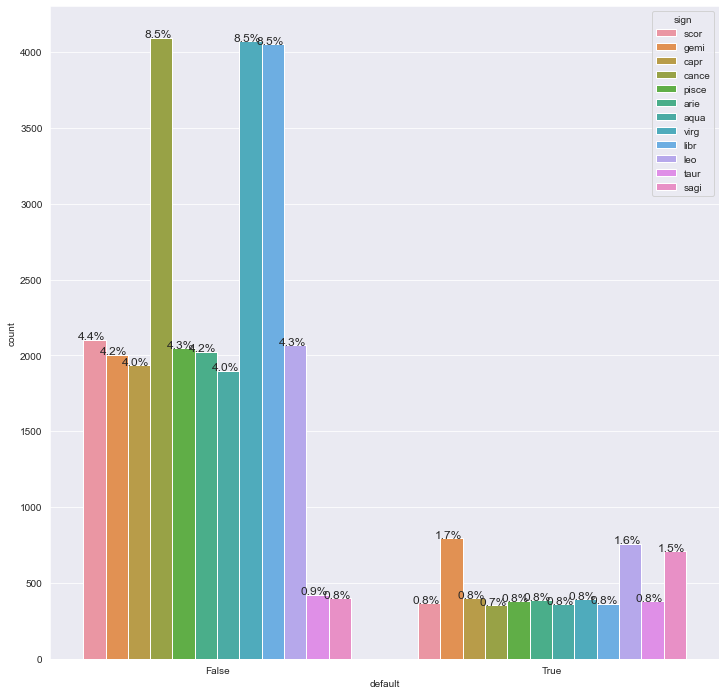

In [14]:
fig, ax = plt.subplots(1,1, figsize = (12,12))

sns.countplot(data = df, 
              x    = 'default', 
              hue  ='sign', 
              ax   = ax)

display_percent_count_plot(ax, df['sign'], 1)

Como podemos vez, considerando o conjunto dos clientes que não pagaram seus empréstimos, o número de maus pagadores é estatísticamente invariante de acordo com o signo dos clientes, assumindo um nível de significância de até no mínimo 1%. Vou esperar a análise de relevância para decidir se descarto ou não esta variável

#### Análise das variáveis *var_i*

Aqui, desejo categorizar os pagadores de acordo com os preditores *var_a*, *var_b*, etc.

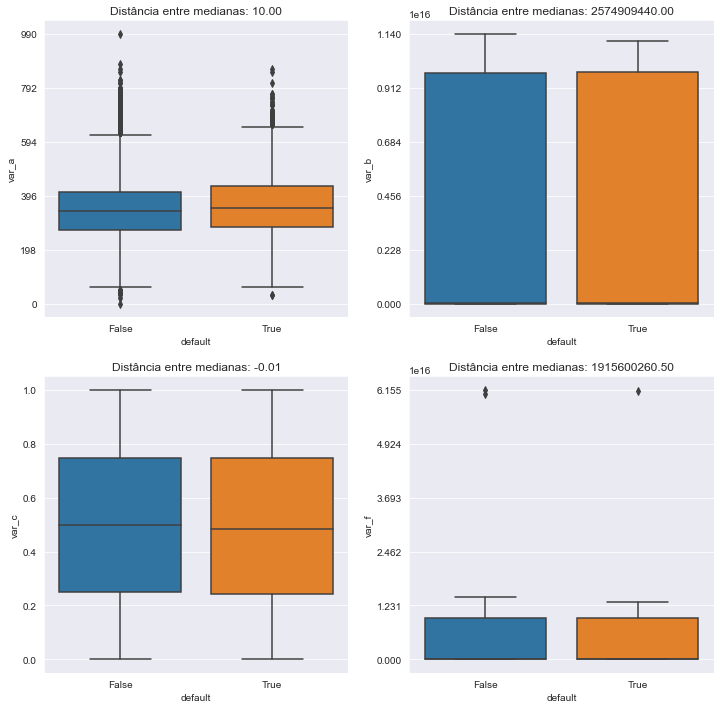

In [15]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

for axis, feat in zip( ax.reshape(-1), ['var_a', 'var_b', 'var_c', 'var_f'] ):
    sns.boxplot(data=df, x='default', y=feat, ax=axis)
    diff_medi = dist_medians(df, feat, 'default')
    axis.set_yticks(np.linspace(0,df[feat].max(), num=6))
    axis.set_title('Distância entre medianas: %.2f' % diff_medi, fontsize=12)

Considerando as visualizações acima, podemos ver que as medianas (métrica de tedência central) e desvios-padrões (métrica de dispersão) são extremamente parecidos para as variáveis *var_a*, *var_b* e *var_c*. Além disso, claramente existe um problema de scalling, já que os valores de *var_b* são muitas ordens de grandeza maior que os valores das outras duas variáveis. Caso esta variável seja incluída no modelo, isto deverá ser levado em conta.

Na variável *var_f* existem poucas entradas com valores muito discrepantes, que podem ser considerados como outliers e removidos, já que não fazem diferença para categorizar os clientes.

In [16]:
df.drop(df['var_f'].sort_values(ascending=False)[:3].index, inplace=True)

Text(0.5, 1.0, 'Distância entre medianas: 1854993589.50')

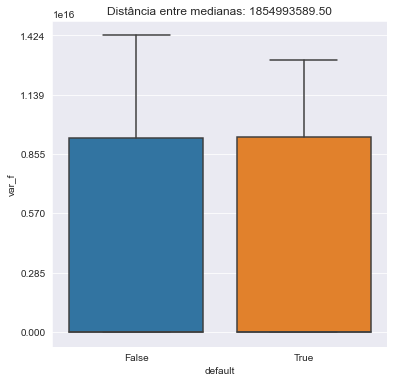

In [17]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

sns.boxplot(data=df, x='default', y='var_f', ax=ax)
diff_medi = dist_medians(df, 'var_f', 'default')
#axis.set_ylim(-7.5,df[feat].max()+7.5)
ax.set_yticks(np.linspace(0,df['var_f'].max(), num=6))
ax.set_title('Distância entre medianas: %.2f' % diff_medi, fontsize=12)

Por fim, parece que nenhuma destas variáveis numéricas são relevantes para distinguir entre as duas categorias de clientes desejáveis. Abaixo, vejamos sobre as variáveis categóricas *var_d* e *var_e*.

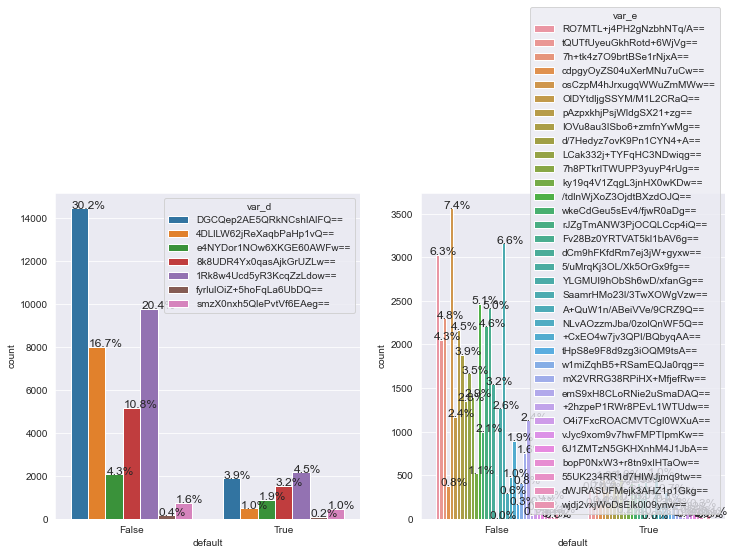

In [18]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.countplot(data = df, 
              x    = 'default', 
              hue  ='var_d', 
              ax   = ax[0])

sns.countplot(data = df, 
              x    = 'default', 
              hue  ='var_e', 
              ax   = ax[1])

display_percent_count_plot(ax[0], df['var_d'], 1)
display_percent_count_plot(ax[1], df['var_e'], 1)

Apesar de difícil interpretação, parece que a variável *var_d* é relevante para a categorização dos clientes. Por outro lado, a variável *var_e* possui alta cardinalidade, o que pode causar overfitting. Adiante, após analise de relevância, vou decidir se elimino ou não esta variável do meu conjunto de treino.

#### Análise da variável risk


Vejamos como a variável risco se comporta entre as classes.

Text(0.5, 1.0, 'Distância entre medianas: 0.03')

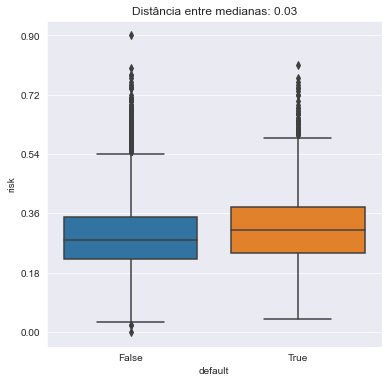

In [19]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

sns.boxplot(data=df, x='default', y='risk', ax=ax)
diff_medi = dist_medians(df, 'risk', 'default')
axis.set_ylim(-7.5,df['risk'].max()+7.5)
ax.set_yticks(np.linspace(0,df['risk'].max(), num=6))
ax.set_title('Distância entre medianas: %.2f' % diff_medi, fontsize=12)

Intuitivamente, este variável sugere uma forma de quantificar o risco em se oferecer crédito a um determinado cliente. Este risco é calculado de uma forma desconhecida por mim, porém, de acordo com estes dados, ainda que exista uma leve diferença entre as tendências centrais e de dispersão das variáveis acima, é estatisticamente impossível de concluir que esta feature seja altamente relevante para a classificação correta dos clientes.

#### Análise das variáveis numéricas *borrowed*, *limit*, *income*

Analogamente ao caso anterior, vamos ver como as variáveis estão distribuídas entre as classes alvo.

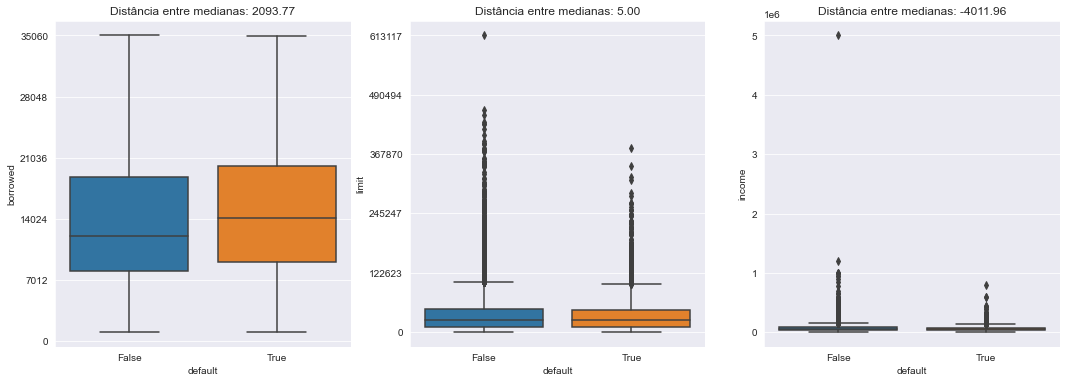

In [20]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

df_noNaN_limit = df[~(df['limit'] == -3290)]

for axis, feat in zip( ax.reshape(-1), ['borrowed', 'limit', 'income'] ):
    
    sns.boxplot(data = df_noNaN_limit, 
                x    = 'default', 
                y    = feat, 
                ax   = axis)
    
    diff_medi = dist_medians(df_noNaN_limit, feat, 'default')
    axis.set_yticks(np.linspace(0,df_noNaN_limit[feat].max(), num=6))
    axis.set_title('Distância entre medianas: %.2f' % diff_medi, fontsize=12)

Aqui vemos que as tendências centrais novamente são bem parecidas. 

Mesmo assim, o centro da distribuição dos valores tomados como empréstimo pelos clientes que não pagaram corretamente é levemente deslocado para cima em comparação com a mesma distribuição para os que pagaram corretamente.

Por outro lado, o contrário acontece quando se trata da variável *income*. Pessoas que ganham menos tendem a não honrar com seus empréstimos.

Além disso, vemos que nas variáveis *limit* e *income* existem dois outliers que não interferem em nada na identificação dos não pagantes.

Vejamos como fica esta visualização após a remoção destes outliers.

Text(0.5, 1.0, 'Distância entre medianas: -3021.99')

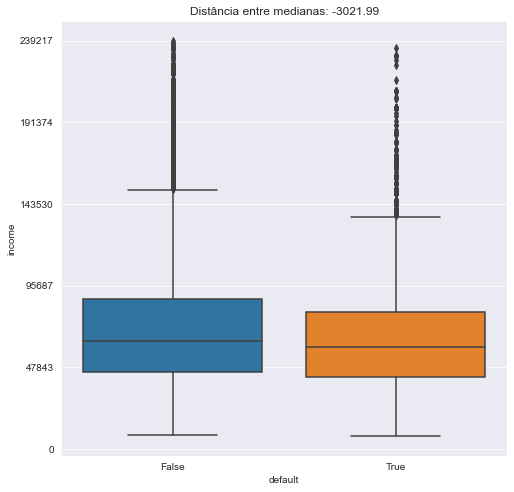

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

df_noNaN_limit = df[~(df['limit'] == -3290)]
df_noNaN_limit.drop(3952, inplace=True)
df_noNaN_limit = df_noNaN_limit[df_noNaN_limit['income']<0.24e6]
feat = 'income'
    
sns.boxplot(data = df_noNaN_limit, 
            x    = 'default', 
            y    = feat, 
            ax   = ax)

diff_medi = dist_medians(df_noNaN_limit, feat, 'default')
ax.set_yticks(np.linspace(0,df_noNaN_limit[feat].max(), num=6))
ax.set_title('Distância entre medianas: %.2f' % diff_medi, fontsize=12)

#### Análise das variáveis categóricas *sex*, *social_network*

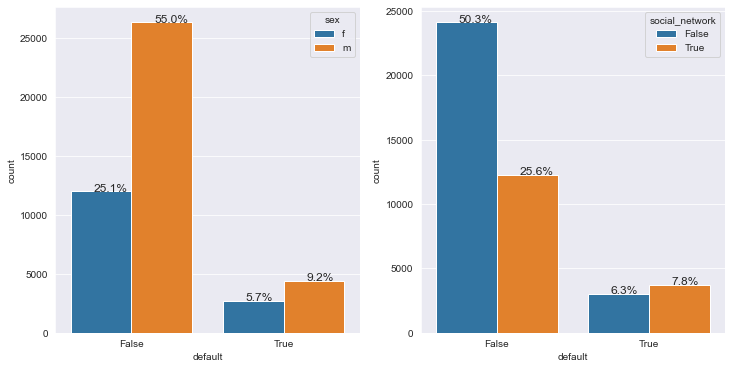

In [22]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

for axis, feat in zip(ax.reshape(-1), ['sex', 'social_network']):
    
    sns.countplot(data = df, 
                  x    = 'default', 
                  hue  = feat, 
                  ax   = axis)

    display_percent_count_plot(axis, df[feat], 1)

Parece que o gênero dos clientes tem uma leve influência no seu perfil de pagamento, porém isso não acontece para a variável *social_network*.

## Análise de Relevância dos Preditores

Nesta seção eu utilizo três abordagens diferentes para categorizar os clientes quanto a variável *default*. Mostro uma grade contendo 4 gráficos 2D referentes as importâncias das variáveis usando três algoritmos diferentes: Logistic Regression, Random Fores Classifier e PCA. Além disso, mostro a variação cumulativa explicatória dada pelo algoritmo PCA, bem como os coeficientes de combinação linear dos componentes principais construídos.

Para isto, vou utilizar um DataFrame que contém nenhum valor faltante.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
risk,4.085552e-02,0.315275,-0.502719,0.091422,0.159691,5.994591e-02,-1.910753e-01,3.036161e-02,1.040238e-01,5.664425e-02,...,2.212029e-03,-0.132029,-1.779936e-01,0.312440,0.532356,-2.902491e-01,7.667626e-02,-4.340435e-02,-8.762285e-06,7.473858e-46
var_a,2.401659e-01,-0.319381,-0.453881,0.241066,0.132804,-2.183807e-01,-2.714603e-02,-1.218568e-02,-1.267619e-01,-2.826211e-01,...,-1.822503e-01,0.146845,2.240688e-01,-0.261858,0.030001,2.088423e-02,3.253779e-01,1.658361e-01,-3.332924e-07,6.443373e-34
var_b,7.829552e-03,0.010602,0.006223,-0.086312,-0.147291,-7.437211e-02,-2.706880e-01,4.816780e-01,-3.562340e-01,7.546864e-02,...,-1.524685e-01,0.229635,-2.381070e-01,-0.017430,0.108636,3.563479e-02,-8.820484e-03,-8.917721e-03,4.361413e-06,-2.336313e-33
var_c,2.304442e-02,-0.056053,0.051634,-0.169354,-0.181384,2.365615e-01,-4.571768e-01,-7.807469e-02,-6.717289e-02,3.522301e-01,...,-3.155643e-01,0.343321,1.450068e-01,0.002317,0.027660,-4.661738e-02,2.065639e-02,-8.564515e-03,5.610047e-07,2.124729e-33
var_d,7.936752e-02,0.328996,-0.448855,-0.321038,-0.103724,9.992420e-02,5.654465e-02,-6.644952e-02,3.995146e-02,-2.861926e-02,...,7.467353e-02,0.130516,8.148090e-02,0.046745,-0.512720,-4.607885e-01,2.368274e-02,-4.254550e-03,1.237292e-06,-2.398086e-35
var_e,6.189644e-02,0.163679,-0.168838,-0.486749,-0.384155,3.945686e-02,3.943663e-01,-9.739570e-02,-2.662035e-02,-4.749962e-02,...,1.066763e-01,0.078942,2.659761e-01,-0.087538,0.435171,1.917860e-01,2.210869e-02,-6.916176e-03,8.755884e-07,8.500414e-34
var_f,3.817272e-02,-0.041175,-0.040236,-0.289776,-0.252229,1.899890e-01,-8.604317e-02,2.344295e-01,-2.023320e-01,-1.099390e-01,...,-1.050544e-01,-0.219825,5.231943e-02,-0.098003,-0.054435,4.066456e-02,-2.222285e-02,6.584051e-03,-2.071749e-06,3.397697e-33
borrowed,4.914035e-01,0.601166,0.052162,0.077890,0.029499,-3.497019e-02,-2.397334e-02,-3.391567e-02,-6.598046e-02,1.384262e-02,...,-8.814872e-02,-0.063001,-3.870137e-02,-0.094528,-0.132272,2.737935e-01,3.287003e-01,-3.884578e-01,3.069383e-05,-3.093472e-34
months,2.774943e-01,0.607769,-0.331216,0.154339,0.013449,3.957540e-02,-6.935671e-02,-4.795464e-02,-1.772189e-02,1.388266e-02,...,-5.794382e-02,-0.028453,-1.536377e-01,-0.237147,-0.068049,3.132445e-01,-3.627901e-01,2.706647e-01,-7.956288e-06,-4.284829e-35
limit,5.690658e-01,0.004252,0.052532,0.137139,0.147378,-1.289381e-01,-5.562395e-02,1.073757e-01,2.674916e-02,-1.269272e-01,...,-1.146566e-02,0.208502,4.594458e-01,0.207902,0.052180,-4.052774e-02,-4.017386e-01,-2.120547e-01,-2.962292e-05,5.260274e-34


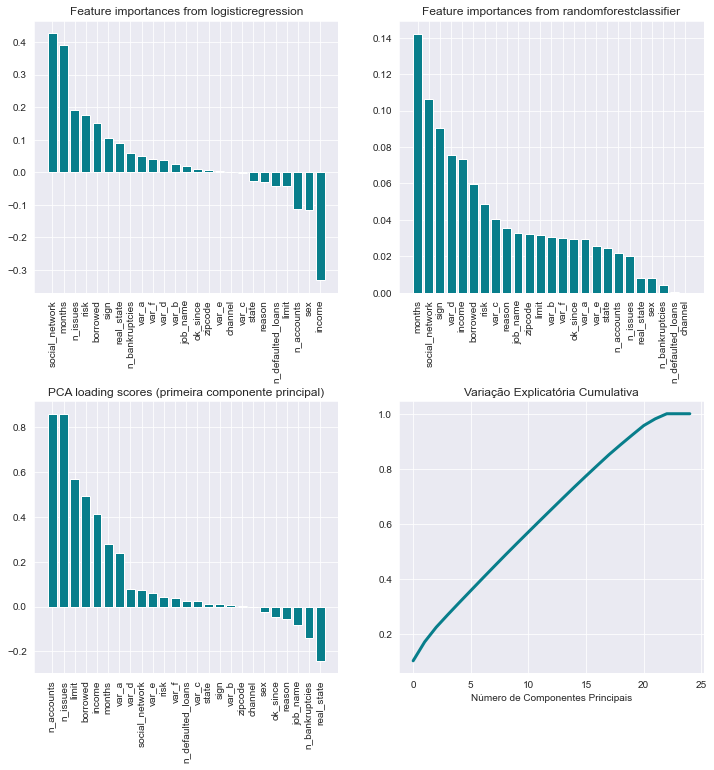

In [23]:
no_nan = df.dropna(axis=0, how='any').copy()

## -- encoding das variáveis
for col in no_nan.columns:
    if (no_nan[col].dtype == object) | (no_nan[col].dtype == "string[pyarrow]"):
        enc         = LabelEncoder()
        no_nan[col] = enc.fit_transform(no_nan[col])
    
X = no_nan.drop(['default'], axis=1).copy()
y = no_nan['default']

fig, ax = plt.subplots(2,2,figsize=(12,12))
loadings = display_feat_import(X, y, ax)
plt.subplots_adjust(hspace=0.4)
loadings

Como podemos ver acima, a variável *sign* é relevante tanto na utilização de modelos de regressão logística quanto na utilização de modelos de árvores, o que contradiz a hipótese levantada anteriormente.

Ainda que, segundo a primeira componente principal dos scores do PCA, a variável *sign* responda quase nada pela variação, vou escolher manter esta variável pela seguinte razão: como temos um dataset de treino com classes alvo desequilibradas em número, devemos caminhar para a escolha de modelos baseados em árvores, já que estes se saem melhor neste tipo de tarefa. Como a variável em questão é bastante importante para o modelo de RandomForest, vou escolher então trabalhar com ela. 

Com isto, vou eliminar apenas a variável *channel* que é a menos importante dentre todas.

In [24]:
df.drop('channel', axis=1, inplace=True)
def_nan.drop('channel', axis=1, inplace=True)
test_data.drop('channel', axis=1, inplace=True)

## Análise de Correlação

Aqui procuro por correlações entre os preditores e vejo como os valores numéricos destes preditores estão distribuídos.


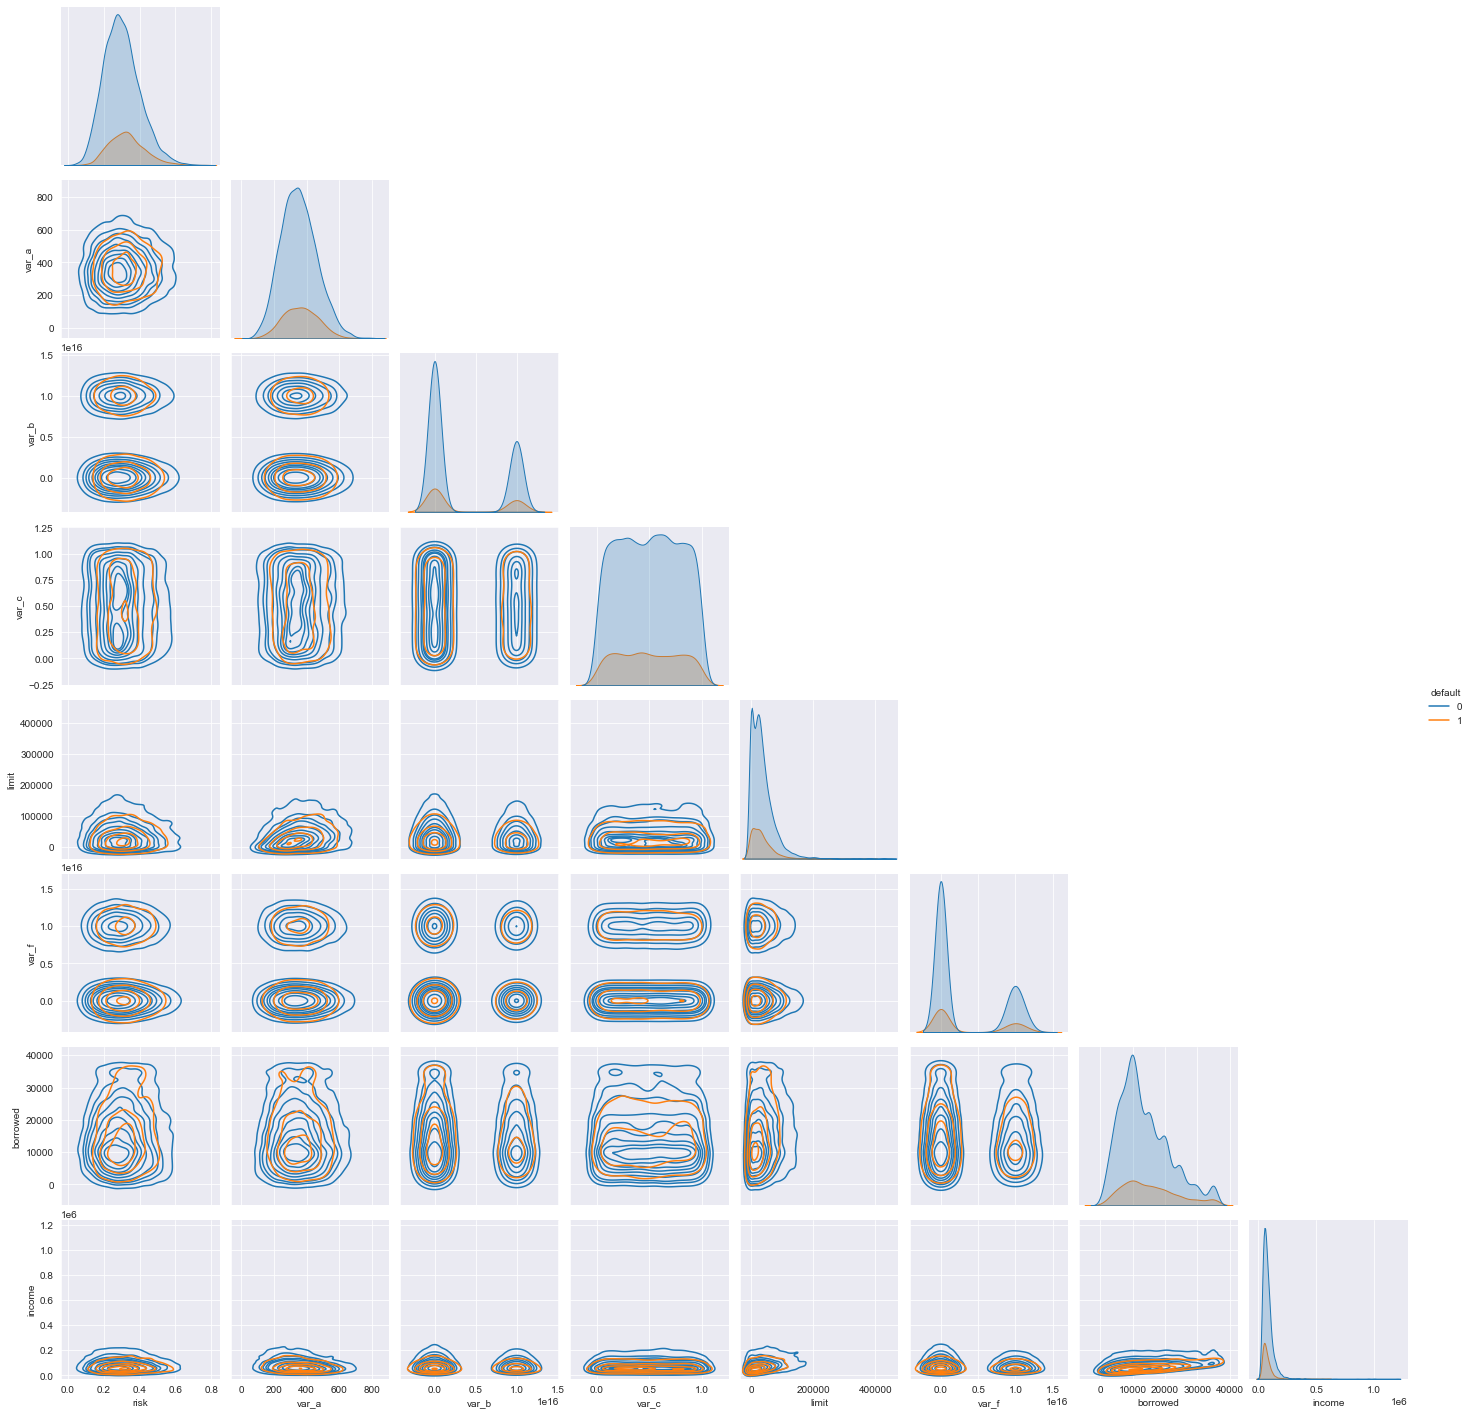

In [25]:
## --- Pair Plot
no_nan = no_nan[['risk','var_a','var_b','var_c','limit','var_f','borrowed','income','default']]
sns.pairplot(data=no_nan, hue='default', kind='kde', diag_kind='kde', corner=True)

Como podemos ver, o grid acima reforça nossas hipóteses anteriores de que é bem dificil de identificar a classe alvo apenas olhando estatísticamente para as variáveis numéricas. Sendo assim, isto reforça minha intuição de que modelos baseados em árvores de decisão se sairam muito melhor nesta tarefa quando comparados com modelos baseados em ajustes, como o de regressão logística por exemplo

<AxesSubplot:>

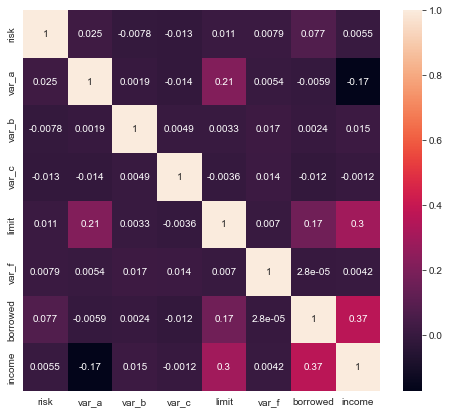

In [26]:
## --- Correlation Matrix
no_nan = no_nan[['risk','var_a','var_b','var_c','limit','var_f','borrowed','income','default']]

fig, ax = plt.subplots(1,1,figsize=(8,7))

sns.heatmap( no_nan.loc[:,~(no_nan.columns.isin(['default']))].corr(), annot=True, ax=ax)

Como podemos ver pela matriz de correlação, a maioria das variáveis quase que não estão correlacionadas entre si. Isto sugere que um modelo do tipo Naive Bayes poderia se sair bem nesta tarefa de classificação.

Por outro lado, as variáveis *income*, *borrowed*, *limit* e *var_a* possuem uma leve correlação entre si. Isto indica que talvez a criação de novas variáveis a partir destas possa ajudar na performance do modelo. Mas antes disso, vou selecionar o modelo baseline sem mexer nas features.

## Modelos Baseline

Para definir o modelo baseline, vou avaliar a performance dos seguintes algoritmos de classificação: **RandomForestClassifier**, **LogisticRegression**, **SVC**, **GaussianNB**, **XGBClassifier**, **LGBMClassifier**. Mas antes de começar, preciso lidar com alguns valores faltantes que ainda estão presentes no DataFrame.

Como as colunas *sex*, *n_defaulted_loans* e *n_bankruptices* possuem poucos valores faltantes e são pouco relevantes para os modelos de classificação baseados em árvores, vou preencher os valores faltantes destas colunas com a moda de cada coluna.

A coluna *n_issues* é um pouco mais relevante para o modelo, por isso vou preencher os valores faltantes com a média da coluna. 

As colunas *sign*, *social_network* e *ok_since* possuem um número significativo de valores faltantes. Como suas entradas possuem alta relevância para a classificação, vou preencher estes valores faltantes com um número arbitrário para que o modelo tente capturar.

In [27]:
## --- preenchimento com a moda
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['n_defaulted_loans'].fillna(df['n_defaulted_loans'].mode()[0], inplace=True)
df['n_bankruptcies'].fillna(df['n_bankruptcies'].mode()[0], inplace=True)

## --- preenchimento com a media
df['n_issues'].fillna( df[~df['n_issues'].isna()]['n_issues'].astype(int).mean(), inplace=True )

## --- preenchimento com valor arbitrário
df['sign'] = df['sign'].apply(lambda x: 'ARB' if type(x) == pd._libs.missing.NAType else x).astype(str)
df['social_network'] = df['social_network'].apply(lambda x: 'ARB' if type(x) == float else x).astype(str)
df['ok_since'] = df['ok_since'].apply(lambda x: -3290 if type(x) == pd._libs.missing.NAType else x).astype(float)

In [28]:
## --- preenchimento com a moda
def_nan['sex'].fillna(def_nan['sex'].mode()[0], inplace=True)
def_nan['n_defaulted_loans'].fillna(def_nan['n_defaulted_loans'].mode()[0], inplace=True)
def_nan['n_bankruptcies'].fillna(def_nan['n_bankruptcies'].mode()[0], inplace=True)

## --- preenchimento com a media
def_nan['n_issues'].fillna( def_nan[~def_nan['n_issues'].isna()]['n_issues'].astype(int).mean(), inplace=True )

## --- preenchimento com valor arbitrário
def_nan['sign'] = def_nan['sign'].apply(lambda x: 'ARB' if type(x) == pd._libs.missing.NAType else x).astype(str)
def_nan['social_network'] = def_nan['social_network'].apply(lambda x: 'ARB' if type(x) == float else x).astype(str)
def_nan['ok_since'] = def_nan['ok_since'].apply(lambda x: -3290 if type(x) == pd._libs.missing.NAType else x).astype(float)

In [29]:
## --- preenchimento com a moda
test_data['sex'].fillna(test_data['sex'].mode()[0], inplace=True)
test_data['n_defaulted_loans'].fillna(test_data['n_defaulted_loans'].mode()[0], inplace=True)
test_data['n_bankruptcies'].fillna(test_data['n_bankruptcies'].mode()[0], inplace=True)

## --- preenchimento com a media
test_data['n_issues'].fillna( test_data[~test_data['n_issues'].isna()]['n_issues'].astype(int).mean(), inplace=True )

## --- preenchimento com valor arbitrário
test_data['sign'] = test_data['sign'].apply(lambda x: 'ARB' if type(x) == pd._libs.missing.NAType else x).astype(str)
test_data['social_network'] = test_data['social_network'].apply(lambda x: 'ARB' if type(x) == float else x).astype(str)
test_data['ok_since'] = test_data['ok_since'].apply(lambda x: -3290 if (type(x) == pd._libs.missing.NAType) else
                                      -3290 if (str(x)[0].isnumeric() == False) else x).astype(float)

Agora, vamos então a escolha do modelo

In [30]:
composed = pd.concat([df.drop('default', axis=1),
                      test_data[df.drop('default', axis=1).columns]])

composed = composed = pd.concat([composed,
                      def_nan[df.drop('default', axis=1).columns]])

## -- encoding das variáveis
for col in composed.columns:
    if (composed[col].dtype == object) | (composed[col].dtype == "string[pyarrow]"):
        enc         = LabelEncoder()
        fit_enc     = enc.fit(composed[col])
        df[col]     = enc.transform(df[col])
        np.save('./encoders/classes_%s.npy' % col, enc.classes_)

In [31]:
algo=[RandomForestClassifier(), LogisticRegression(), SVC(), 
      GaussianNB(), XGBClassifier(), LGBMClassifier()]
score=[]

    
X = df.drop(['default'], axis=1).copy()
y = df['default'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for a in algo:
    a.fit(X_train, y_train)
    y_pred = a.predict(X_test)
    score.append([a.__class__.__name__,
                 accuracy_score(y_test, y_pred), 
                 precision_score(y_test, y_pred),
                 recall_score(y_test, y_pred),
                 f1_score(y_test, y_pred)])

# mostra os scores em formato tabular
pd.DataFrame(score, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


[19:24:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.838782,0.573770,0.035879,0.067535
1,LogisticRegression,0.837281,0.000000,0.000000,0.000000
2,SVC,0.837281,0.000000,0.000000,0.000000
3,GaussianNB,0.837281,0.000000,0.000000,0.000000
4,XGBClassifier,0.844537,0.571195,0.178883,0.272443
5,LGBMClassifier,0.848374,0.655012,0.144029,0.236134


Como já era de se esperar, modelos baseados em árvores de decisão se sairam muito melhor na classificação que os outros modelos. Em geral, como já havia comentado, existe uma dificuldade em se identificar os clientes que são mau pagadores; isso fico evidente ao se olhar para a métrica **recall**.

De qualquer forma, daqui pra frente ou utilizar o algoritmo de XGBClassifier, já que este se saiu melhor que todos os outros testados.

##### Avaliações do XGBClassifier

Vamos ver agora a matriz de confusão e o classification report para este modelo

In [32]:
clf = XGBClassifier(eval_metric='error')
clf. fit(X_train, y_train)
y_pred = clf.predict(X_test)

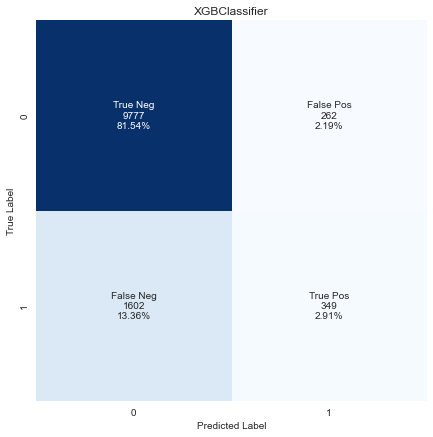

In [33]:
## --- Confusion Matrix

fig, ax = plt.subplots(1,1, figsize=(7,7))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=cf_matrix_labels(cm), fmt='', cmap='Blues', ax=ax, cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('XGBClassifier')

plt.subplots_adjust(hspace=0.3)

Como podemos ver, para a classe *default==1* o número de verdadeiros positivo é muito menor que o número de falsos negativo. O que confirma o comentário anterior.

In [34]:
print('XGBClassifier')
print(classification_report(y_test, y_pred, target_names=['Not Defaulted', 'Defaulted']))
print('\n')

XGBClassifier
               precision    recall  f1-score   support

Not Defaulted       0.86      0.97      0.91     10039
    Defaulted       0.57      0.18      0.27      1951

     accuracy                           0.84     11990
    macro avg       0.72      0.58      0.59     11990
 weighted avg       0.81      0.84      0.81     11990





O classification report acima nos mostra que ainda precisamos melhorar a habilidade do moelo em capturar os clientes *defaulted*.

## Feature Engineering

Primeiro, vou criar um pipeline para lidar com o problema de scalling. Normalmente, este tipo de modelo não é afetado por problemas de escala. De qualquer jeito, vou executar este teste.

In [35]:
X = df.drop(['default'], axis=1).copy()
y = df['default'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = make_pipeline( StandardScaler(), XGBClassifier(eval_metric='error') )
clf. fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('XGBClassifier')
print(classification_report(y_test, y_pred, target_names=['Not Defaulted', 'Defaulted']))
print('\n')

XGBClassifier
               precision    recall  f1-score   support

Not Defaulted       0.86      0.97      0.91     10039
    Defaulted       0.56      0.18      0.27      1951

     accuracy                           0.84     11990
    macro avg       0.71      0.58      0.59     11990
 weighted avg       0.81      0.84      0.81     11990





Para simplificar ainda mais, vou eliminar as variáveis *n_defaulted_loans* e *n_bankruptcies*

In [36]:
X = df.drop(['default','n_defaulted_loans','n_bankruptcies'], axis=1).copy()
y = df['default'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = make_pipeline( StandardScaler(), XGBClassifier(eval_metric='error') )
clf. fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('XGBClassifier')
print(classification_report(y_test, y_pred, target_names=['Not Defaulted', 'Defaulted']))
print('\n')

XGBClassifier
               precision    recall  f1-score   support

Not Defaulted       0.86      0.97      0.91     10039
    Defaulted       0.56      0.18      0.27      1951

     accuracy                           0.84     11990
    macro avg       0.71      0.58      0.59     11990
 weighted avg       0.81      0.84      0.81     11990





Nada muda. Porém, testei eliminar outras variáveis como *sex* e *real_state* e a performance só piora. Agora, vou usar um algoritmo de clusterização para tentar encontrar algum padrão e adicionar as classes aos valores faltantes da variável *default* no dataset de treino.

In [37]:
df.drop(['n_defaulted_loans','n_bankruptcies'], axis=1, inplace=True)
def_nan.drop(['n_defaulted_loans','n_bankruptcies','default'], axis=1, inplace=True)
test_data.drop(['n_defaulted_loans','n_bankruptcies'], axis=1, inplace=True)
def_nan.dropna(axis=0, how='any', inplace=True)

In [38]:
## -- encoding das variáveis
for col in def_nan.columns:
    if (def_nan[col].dtype == object) | (def_nan[col].dtype == "string[pyarrow]"):
        enc               = LabelEncoder()
        enc.classes_ = np.load('./encoders/classes_%s.npy' % col, allow_pickle=True)
        def_nan[col]      = enc.transform(def_nan[col])

## --- instanciamento do agrupador
nclust = 2
model = make_pipeline(StandardScaler(), KMeans(n_clusters=nclust, random_state=42, n_init=50, max_iter=2000, tol=1e-5))
model.fit(def_nan)

## --- atribui a cada amostra um grupo
def_nan['default'] = model.predict(def_nan)

In [39]:
composed = pd.concat([df,def_nan[df.columns]])

X = composed.drop(['default'], axis=1).copy()
y = composed['default'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

clf = make_pipeline( StandardScaler(), XGBClassifier(eval_metric='error') )
clf. fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('XGBClassifier')
print(classification_report(y_test, y_pred, target_names=['Not Defaulted', 'Defaulted']))
print('\n')

XGBClassifier
               precision    recall  f1-score   support

Not Defaulted       0.86      0.96      0.91     10570
    Defaulted       0.56      0.22      0.32      2186

     accuracy                           0.84     12756
    macro avg       0.71      0.59      0.61     12756
 weighted avg       0.81      0.84      0.81     12756





Agora sim podemos ver uma melhora bastante expressiva. Existem alguns métodos estatísticos para imputação de dados que poderiam melhor um pouco mais a performance do modelo neste momento, porém, devido a falta de tempo e a necessidade de se entregar uma solução, vou partir para etapa de ajuste de hiperparâmetros de uma vez e caso sobre tempo, volto para esta parte.

## Ajuste de Hiperparâmetros

Para finalizar, farei um fine tunning no algortimo de XGBC para encontrar a combinação de parâmetro que entrega a melhor performance possível.

In [40]:
param_grid = {'n_estimators' : [50,70],  
              'max_depth'    : [5,8],
              'learning_rate': [0.1,1.15],
              'booster'      : ['gbtree','gblinear','dart']
             }
                
grid = GridSearchCV(XGBClassifier(eval_metric='error', use_label_encoder=False), 
                    param_grid, 
                    refit   = True, 
                    verbose = 3, 
                    n_jobs  = -1, 
                    scoring ='recall') 

## --- ajustando o modelo pelo GridSearch
grid_result = grid.fit(X, y)
best_params = grid_result.best_params_
print(best_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[19:30:56] WARNING: ../src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'booster': 'gblinear', 'learning_rate': 1.15, 'max_depth': 8, 'n_estimators': 50}


Vou executar o GridSearch mais uma vez para me certificar de que não estou esbarrando em algum limite.

In [41]:
param_grid = {'n_estimators' : [90,120],  
              'max_depth'    : [5],
              'learning_rate': [1.25, 1.35],
              'booster'      : ['gbtree']
             }
                
grid = GridSearchCV(XGBClassifier(eval_metric='error',use_label_encoder=False), 
                    param_grid, 
                    refit   = True, 
                    verbose = 3, 
                    n_jobs  = -1, 
                    scoring = 'recall') 

## --- ajustando o modelo pelo GridSearch
grid_result = grid.fit(X, y)
best_params = grid_result.best_params_
print(best_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'booster': 'gbtree', 'learning_rate': 1.35, 'max_depth': 5, 'n_estimators': 120}


Agora vejamos como ficou a performance final.

In [42]:
composed = pd.concat([df,def_nan[df.columns]])

X = composed.drop(['default'], axis=1).copy()
y = composed['default'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = make_pipeline( StandardScaler(), XGBClassifier(eval_metric       = 'error',
                                                     booster           = 'gbtree',
                                                     learning_rate     = 1.25,
                                                     max_depth         = 5,
                                                     use_label_encoder = False,
                                                     n_estimators      = 90  ) )
clf. fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('XGBClassifier')
print(classification_report(y_test, y_pred, target_names=['Not Defaulted', 'Defaulted']))
print('\n')

XGBClassifier
               precision    recall  f1-score   support

Not Defaulted       0.86      0.91      0.89     10631
    Defaulted       0.38      0.27      0.31      2125

     accuracy                           0.80     12756
    macro avg       0.62      0.59      0.60     12756
 weighted avg       0.78      0.80      0.79     12756





Vale notar que aqui o GridSearch utiliza validação cruzada no processo de calculo da métrica recall. Normalmente estes resultados são mais confiáveis pois indicam melhor a capacidade de generalização do modelo. Não utilizei um k-fold CV antes, para economizar tempo.

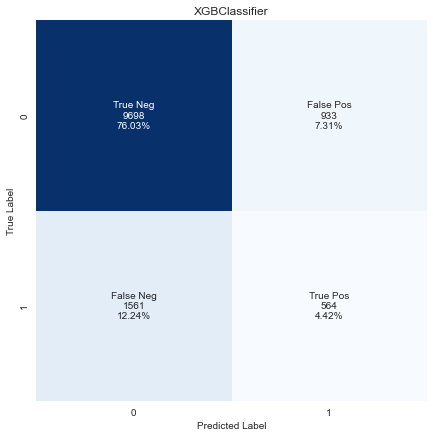

In [43]:
## --- Confusion Matrix
fig, ax = plt.subplots(1,1, figsize=(7,7))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=cf_matrix_labels(cm), fmt='', cmap='Blues', ax=ax, cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('XGBClassifier')

plt.subplots_adjust(hspace=0.3)

Como podemos ver, ainda que a performance do modelo não seja a melhor possível, com a utilização de um clusterizador e a realização de ajustes nos hiperparâmetros, consegui melhorar expressivamente a performance do modelo em identificar corretamente os cliente que são maus pagadores; a custo de uma leve piora no *recall* dos bons pagadores de empréstimos.

Para escolher corretamente qual conjunto de parâmetros utilizar, precisamos conhecer a resposta para a seguinte pergunta de negócio: o que é mais importante nesta tarefa? Identificar corretamente o maior número possível de bons pagadores ou identificar corretamente o maior número possível de maus pagadores? Ser acertivo na tomada de decisão quanto a classificação do perfil de pagamento?

O ideal seria realizar todas as possibilidades acima, mas na prática o lençol é curto.

## Conclusões e Resultados Finais

Considerando as análises e testes anteriores, no momento, entregaria a seguinte solução: a cominação de um modelo de aprendizado não supervisionado para clusterizar os clientes com um modelo classificador que é capaz de classificar os cliente quanto ao perfil de pagamento e suas probabilidades de pagar ou não suas dívidas.

A solução é capaz de identificar cerca de 92% até 97%, a depender das métricas de negócio, dos bons pagadores e possui uma taxa de acerto de 87%. No que diz respeito aos maus pagadores, este produto identifica cerca de 40% dos maus pagadores, e a taxa de acerto pode variar de 42% até 73% a depender dos objetivos da empresa.

Para escolher corretamente qual conjunto de parâmetros utilizar, precisamos conhecer as respostas para as seguintes pergunta de negócio: o que é mais importante nesta tarefa? Identificar corretamente o maior número possível de bons pagadores ou identificar corretamente o maior número possível de maus pagadores? Ser acertivo na tomada de decisão quanto a classificação do perfil de pagamento? A resposta para estas perguntas pode ser dada pelo time de negócios ou até mesmo pelo cientista de dados, desde que este conheça bem o modelo de negócios com o qual ele trabalha.

De qualquer forma, esta solução entrega um processo automatizado, escalável e que não depende de decisões subjetivas; o que gera economia de tempo, recurso e mão de obra. Além disso, com o uso de uma plataforma cloud, este produto pode ser acessado facilmente por diversas pessoas e aplicações dentro e até fora da empresa; o que abre espaço para criação de novos produtos financeiros.

#### Possíveis Próximos Passos

Utilizar um método estatistico-computacional para inputação de entradas no conjunto de treino que contenham mais informações sobre os clientes que não pagaram suas dívidas, melhorando assim o desbalanceamento das classes presente no dataset.

Utilizar outros algoritmos de regressão para prever os valores faltantes das variáveis numéricas utilizadas no modelo. Em geral, sistemas de AI que utilizam mais de um algoritmo de ML exibem alta performance.

Definir bem os objetivos de negócio de forma a escolher os conjuntos de modelos e parâmetro mais adequados para entregar um produto de dados que melhor soluciona o problema e cumpre com a sua missão dentro da empresa.

#### Predição do Arquivo de Teste

In [44]:
## --- encoding de variáveis
for col in test_data.columns:
    if (test_data[col].dtype == object) | (test_data[col].dtype == "string[pyarrow]"):
        enc                 = LabelEncoder()
        enc.classes_        = np.load('./encoders/classes_%s.npy' % col, allow_pickle=True)
        test_data[col]      = enc.transform(test_data[col])
        
## --- classificações
test_data['default'] = clf.predict(test_data)
test_data['default'] = test_data['default'].astype(bool)
test_data['probas']  =  [x[0] if x[0] > x[1] else x[1] for x in clf.predict_proba(test_data.drop('default', axis=1))]

## --- gravação do arquivo final
test_data.to_csv(open('./outputs/final_submissions.csv', 'w'), index=False)